In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

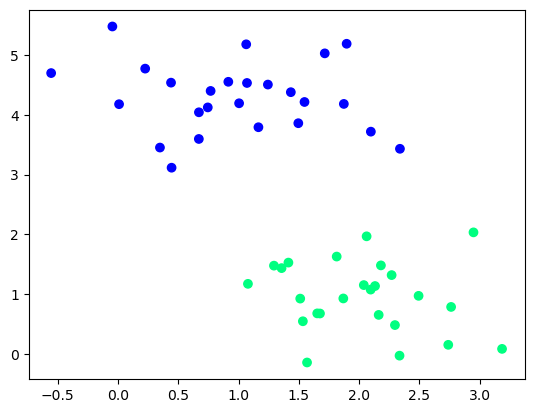

In [56]:
## Generate samples
## X - Random input sample(having and X and Y coordinates)
## Y-Target class(0,1)
from sklearn.datasets._samples_generator import make_blobs
X,Y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

## While plotting X-coordinate is 0th col and Y-coordinate is 1st col
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter')


This is a perfectly linearly seperable data.

In [57]:
## Apply SVM
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1)
svc.fit(X,Y)

SVC(C=1, kernel='linear')

In [58]:
## Plotting the decision function in SVC

def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ## plt.gca()--> Get the current Axes
        ax=plt.gca()
    xlim=ax.get_xlim()  ##xlim-->(0,1)
    ylim=ax.get_ylim()  ##ylim-->(0,1)
    
    ## Create a grid to evaluate a model
    x=np.linspace(xlim[0],xlim[1],30) ## Generate 30 numbers between xlim[0] i.e. 0 and xlim[1] i.e. 1.(Equidistant)
    y=np.linspace(ylim[0],ylim[1],30) ## Generate 30 numbers between ylim[0] i.e. 0 and ylim[1] i.e. 1.(Equidistant)

    ##The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays
    ## x1=[1,2] and y1=[3,4,5] -->meshgrid output for this will be
    ## x11=[[1,2],      and     y11=[[3,4,5],
    ##      [1,2],                  [3,4,5],
    ##      [1,2]]                  [3,4,5]]
    
    Y,X=np.meshgrid(y,x)
    ##print(len(X),len(Y)) --> Length is 30 for both

    ## Ravel flattens the array and vstack stacks the araay one above the other
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svc.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

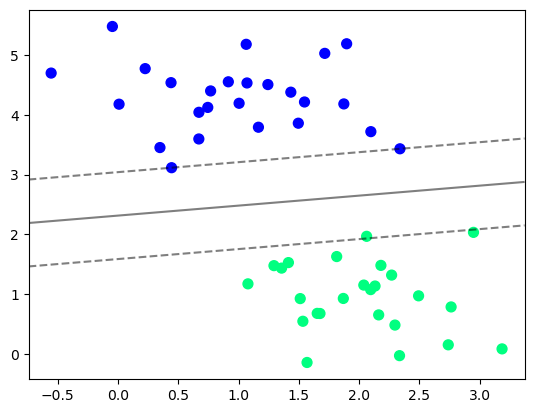

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='winter')
plot_svc_decision_function(svc)

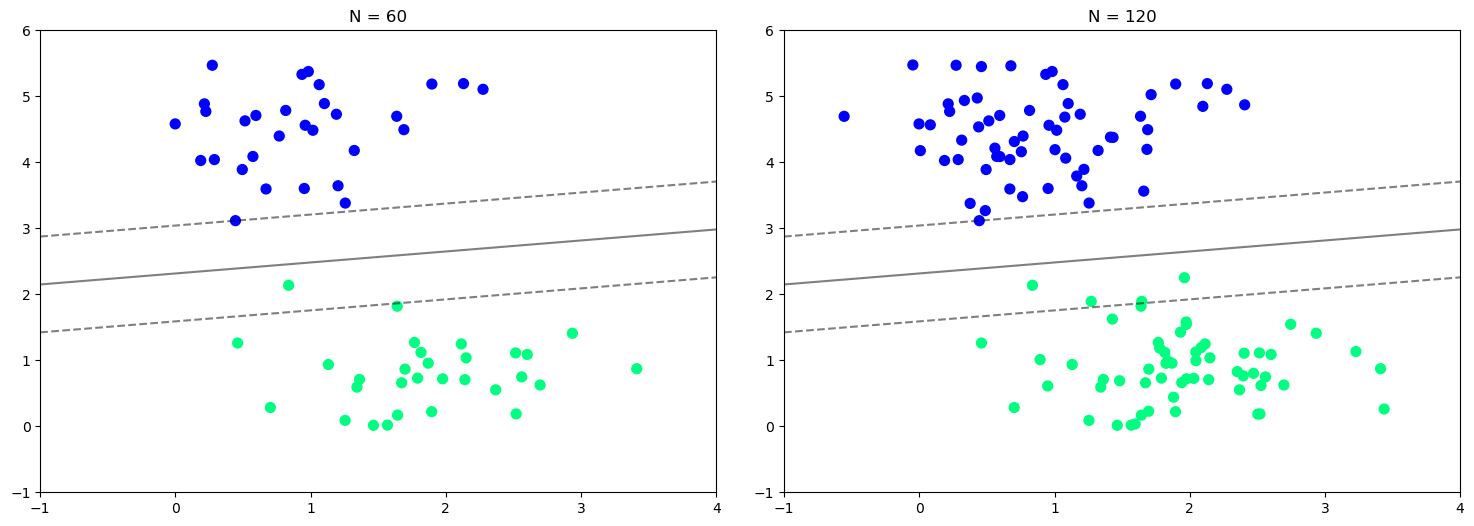

In [60]:
## Plotting 60 and 120 points
## With this we could see the SVM gets impacted majorly by supports vectors only. Increasing number of point wont create any issues.

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

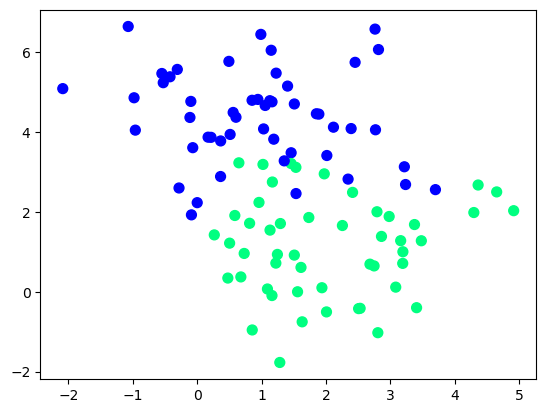

In [61]:
## Almost linearly seperable data..Not as clear as above but can work under linear case.
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');


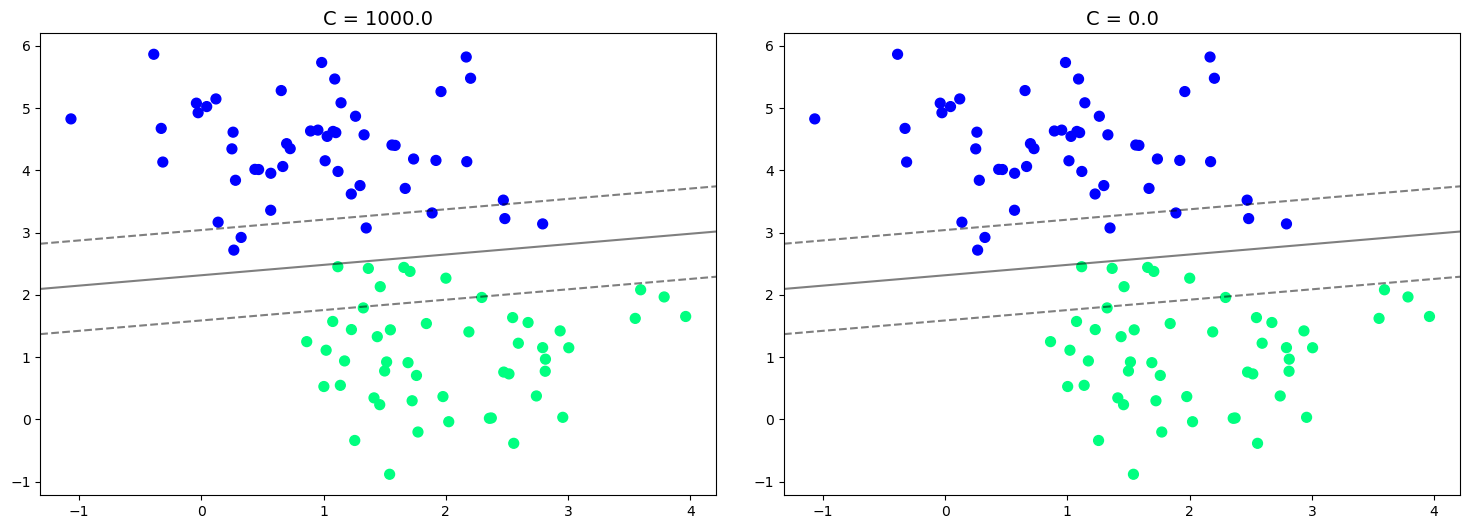

In [62]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [1000.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Generally C is 1. When we increase C value the margin contracts i.e. when we increase C value , we are telling model to reduce classification error(The points within margin should be less means classification error should be less) even if margin is getting contracted. But when we decrease C value then margin extends i.e. when we are decreasing C value, we are telling model to not worry about classification error much but focus on increasing the margin. C is a hyperparameter and we can use gridSearchCV to find appropriate C value.